In [59]:
import numpy as np
import matplotlib.cm as cm
object_colors = cm.nipy_spectral(np.linspace(0, 1, 12))

In [55]:
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline


# call this script from the directory which has both the *label*.png and *predlabels*.png files

dir_full_path = "/home/peteflo/tensorflow-deeplab-resnet/output_all_sixobject_networks_hz/"

with open(os.path.join(dir_full_path,"summary.txt")) as f:
        content = f.readlines()

content = [x.strip() for x in content]

# x axis is hz
x_axis = [0.03, 0.3, 3.0, 30.0]

ious_by_label = {}
std_by_label = {}

object_name_to_label = {}

for i in content:
    split = i.split()
    if len(split) == 1:
        trial_name = i
        print "trial name", i
        continue

    label_number = split[0]
    iou          = split[1]
    std          = split[2]
    object_name  = split[3]

    object_name_to_label[object_name] = int(label_number)
    
    if object_name not in ious_by_label.keys():
        ious_by_label[object_name] = []
        std_by_label[object_name] = []

    ious_by_label[object_name].append(float(iou))
    std_by_label[object_name].append(float(std))

trial name predlabels_hz_sixobjects_mixed_train_36_scenes_00_03hz.png
trial name predlabels_hz_sixobjects_mixed_train_36_scenes_00_30hz.png
trial name predlabels_hz_sixobjects_mixed_train_36_scenes_03_00hz.png
trial name predlabels_hz_sixobjects_mixed_train_36_scenes_30_00hz.png


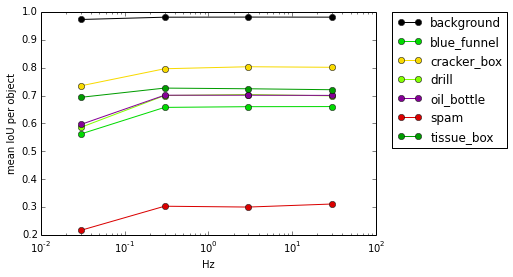

In [57]:
for object_name, val in sorted(ious_by_label.iteritems()):
    plt.semilogx(x_axis, val, 'o-', color=object_colors[object_name_to_label[object_name]][:3], label=object_name)
    #plt.errorbar(x_axis, val, std_by_label[object_name])

plt.xlabel("Hz")
plt.ylabel("mean IoU per object")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

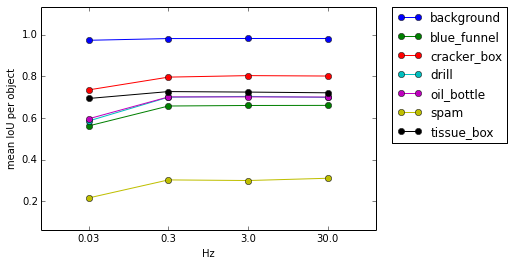

In [17]:
my_x_axis = [1, 2, 3, 4]

for object_name, val in sorted(ious_by_label.iteritems()):
    plt.plot(my_x_axis, val, 'o-', label=object_name)
    #plt.errorbar(x_axis, val, std_by_label[object_name])

labels = ["0.03", "0.3", "3.0", "30.0"]
labels_top = [4, 40, 400, 4000]
plt.xticks(my_x_axis, labels)
plt.xlabel("Hz")
plt.ylabel("mean IoU per object")
plt.margins(0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

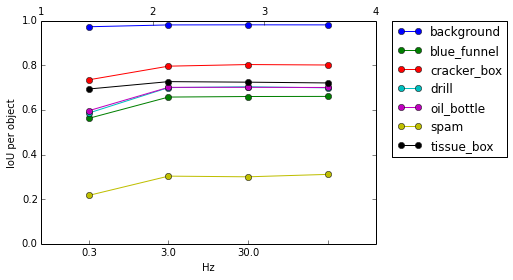

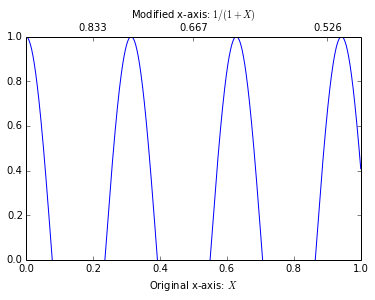

In [13]:
import numpy as np

my_x_axis = [1, 2, 3, 4]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for object_name, val in sorted(ious_by_label.iteritems()):
    ax1.plot(my_x_axis, val, 'o-', label=object_name)
    #plt.errorbar(x_axis, val, std_by_label[object_name])

labels = ["0.03", "0.3", "3.0", "30.0"]
labels_top = [4, 40, 400, 4000]

ax1.set_ylim(0, 1)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(my_x_axis)
ax1.set_xticklabels(labels)
ax1.set_xlabel("Hz")
ax1.set_ylabel("IoU per object")



ax1.margins(0.2)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

X = np.linspace(0,1,1000)
Y = np.cos(X*20)

ax1.plot(X,Y)
ax1.set_xlabel(r"Original x-axis: $X$")

new_tick_locations = np.array([.2, .5, .9])

def tick_function(X):
    V = 1/(1+X)
    return ["%.3f" % z for z in V]

ax1.set_ylim(0, 1)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")
plt.show()